In [1]:
import os
import sv as SV
import numpy as np 
import astropy.table as atable
import astropy.io.fits as fits

from tqdm.notebook import tqdm, trange

In [2]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.use('Agg')
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
fuji_exps = SV.info_exposures(release='fuji')
guad_exps = SV.info_exposures(release='guadalupe') 

In [4]:
in_bright = (fuji_exps['FAPRGRM'] == 'bgsmws') | (fuji_exps['FAPRGRM'] == 'bright')
print("%i exposures in BRIGHT" % np.sum(in_bright))

sv1_exps = fuji_exps[(fuji_exps['SURVEY'] == 'sv1') & in_bright]
sv3_exps = fuji_exps[(fuji_exps['SURVEY'] == 'sv3') & in_bright]

print('%i SV1 BRIGHT exposure' % len(sv1_exps))
print('%i SV3 BRIGHT exposure' % len(sv3_exps))

in_bright = (guad_exps['FAPRGRM'] == 'bgsmws') | (guad_exps['FAPRGRM'] == 'bright')
main_exps = guad_exps[(guad_exps['SURVEY'] == 'main') & in_bright]
print('%i MAIN BRIGHT exposure' % len(main_exps))

897 exposures in BRIGHT
562 SV1 BRIGHT exposure
288 SV3 BRIGHT exposure
377 MAIN BRIGHT exposure


In [5]:
print('%i SV1 Tiles' % len(np.unique(sv1_exps['TILEID'])))
print('%i SV3 Tiles' % len(np.unique(sv3_exps['TILEID'])))
print('%i MAIN Tiles' % len(np.unique(main_exps['TILEID'])))

50 SV1 Tiles
214 SV3 Tiles
343 MAIN Tiles


In [8]:
sv3_exps[:5]

NIGHT,EXPID,TILEID,TILERA,TILEDEC,MJD,SURVEY,PROGRAM,FAPRGRM,FAFLAVOR,EXPTIME,EFFTIME_SPEC,GOALTIME,GOALTYPE,MINTFRAC,AIRMASS,EBV,SEEING_ETC,EFFTIME_ETC,TSNR2_ELG,TSNR2_QSO,TSNR2_LRG,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBDARK,TSNR2_GPBBRIGHT,TSNR2_GPBBACKUP,LRG_EFFTIME_DARK,ELG_EFFTIME_DARK,BGS_EFFTIME_BRIGHT,LYA_EFFTIME_DARK,GPB_EFFTIME_DARK,GPB_EFFTIME_BRIGHT,GPB_EFFTIME_BACKUP,TRANSPARENCY_GFA,SEEING_GFA,FIBER_FRACFLUX_GFA,FIBER_FRACFLUX_ELG_GFA,FIBER_FRACFLUX_BGS_GFA,FIBERFAC_GFA,FIBERFAC_ELG_GFA,FIBERFAC_BGS_GFA,AIRMASS_GFA,SKY_MAG_AB_GFA,SKY_MAG_G_SPEC,SKY_MAG_R_SPEC,SKY_MAG_Z_SPEC,EFFTIME_GFA,EFFTIME_DARK_GFA,EFFTIME_BRIGHT_GFA,EFFTIME_BACKUP_GFA
int32,int32,int32,float64,float64,float64,bytes7,bytes6,bytes16,bytes19,float64,float64,float64,bytes6,float64,float32,float64,float64,float32,float32,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float64,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
20210405,83522,12,150.04,2.286,59310.11613139,sv3,bright,bright,sv3bright,1087.2236328125,1.9236856698989868,220.0,bright,0.9,1.268318,0.020766111090779305,1.2415820360183716,1.970515,0.21425875,0.052984197,0.14324081,0.20928036354921964,13.740612,19.383429,3.9631586,36.20106,1.7658519,1.8426253,1.9236857,2.394116719537762,1.6779697,2.0815804,2.6531513,0.0740698694393078,1.2750868969641278,0.46926167510731964,0.35087031639049493,0.16444694231100038,0.0583045357430305,0.05969941794132611,0.060956749956209914,1.2476632901391898,20.185822131786963,20.86530546618676,20.25428965620122,19.240197256499567,1.8870579585438345,1.7923976815759473,1.8870579585438345,1.7895321787468264
20210405,83526,39,179.599,0.12,59310.15691424,sv3,bright,bright,sv3bright,491.12127685546875,209.63267517089844,220.0,bright,0.9,1.535416,0.02397846430540085,1.4460439682006836,223.95001,23.476738,5.7870016,16.166882,14.021407958539204,1497.3762,2246.3516,424.69586,2974.7344,199.30296,201.89995,209.63268,160.4015142925898,194.46043,223.06415,218.01627,1.1160679283394475,1.3307057969974616,0.4410218325803964,0.33404195564548156,0.15775461328498286,0.8216242344281088,0.8451683334320832,0.8623143683992909,1.515339026465338,20.857570201417026,21.91405137246808,20.991255457249398,19.173973011449906,245.7957933850711,224.71317050550545,245.7957933850711,242.64191172605027
20210405,83527,66,183.106,0.12,59310.16505076,sv3,bright,bright,sv3bright,572.2549438476562,178.224853515625,220.0,bright,0.9,1.548655,0.021806303411722183,1.5604569911956787,219.89665,19.969273,4.9097342,13.732455,11.623024940793403,1273.0347,1892.1643,361.20374,2612.558,169.2917,171.73575,178.22485,132.96459290512186,163.79942,189.716,191.47261,1.0604372209586597,1.483372166801359,0.3927273914264954,0.3025210488076052,0.14434937212353102,0.6600202346705586,0.702521104085551,0.7302867862606071,1.5235964979314538,20.869874103784944,21.892886892193975,21.005445864911803,19.253570886109244,215.2816703680001,192.43258885844494,215.2816703680001,186.92682957586328
20210405,83528,93,189.944,61.918,59310.17592541,sv3,bright,bright,sv3bright,1080.5513916015625,4.606791019439697,220.0,bright,0.9,1.321006,0.01267525739967823,1.451725959777832,4.13118,0.5207639,0.13072187,0.35235283,0.6544991861330345,32.90565,43.167572,8.82522,80.31184,4.3437543,4.4785695,4.606791,7.487312320519898,3.7368972,4.635294,5.8859997,0.08465602356496543,1.0392766798987463,0.5742542783883974,0.41256853862696674,0.1891300085130472,0.07350076065776642,0.07297673241037726,0.07309977677187253,1.3038368969004397,20.129518417713655,21.40921829385272,20.193538659142266,19.320407722966404,2.627612247108394,2.5832393510232206,2.627612247108394,2.8001584024790733
20210405,83530,120,194.785,28.316,59310.19705733,sv3,bright,bright,sv3bright,881.7928466796875,90.08229064941406,220.0,bright,0.9,1.223642,0.009807771071791649,1.451725959777832,82.99777,9.926826,2.509219,6.8805513,9.782346585858614,643.44495,929.23

In [33]:
sv1_texp = [] 
for tid in np.unique(sv1_exps['TILEID']): 
    is_tile = (sv1_exps['TILEID'] == tid)
    sv1_texp.append(np.sum(sv1_exps['EXPTIME'][is_tile]))

sv3_texp = [] 
for tid in np.unique(sv3_exps['TILEID']): 
    is_tile = (sv3_exps['TILEID'] == tid)
    sv3_texp.append(np.sum(sv3_exps['EXPTIME'][is_tile]))
    
main_texp = [] 
for tid in np.unique(main_exps['TILEID']): 
    is_tile = (main_exps['TILEID'] == tid)
    main_texp.append(np.sum(main_exps['EXPTIME'][is_tile]))

In [34]:
np.min(sv1_texp), np.median(sv1_texp), np.max(sv1_texp)

(600.1322021484375, 4583.65690612793, 10974.983947753906)

In [23]:
np.min(sv3_texp), np.median(sv3_texp), np.max(sv3_texp)

(223.22889709472656, 482.66772079467773, 2670.794536590576)

In [35]:
np.min(main_texp), np.median(main_texp), np.max(main_texp)

(285.5779724121094, 748.9714965820312, 2733.478759765625)

In [32]:
np.mean(np.array(sv3_texp) < 1000)

0.8364485981308412

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


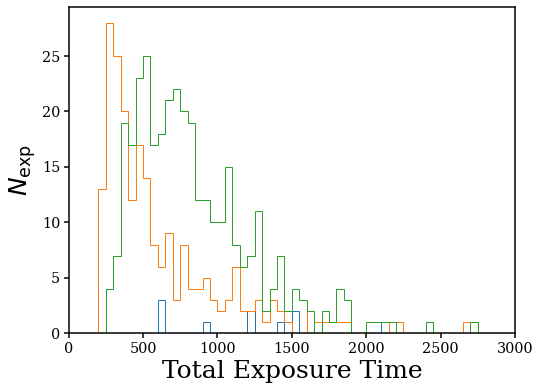

In [36]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
_ = sub.hist(np.array(sv1_texp).flatten(), range=(0, 3000), bins=60, histtype='step')
_ = sub.hist(np.array(sv3_texp).flatten(), range=(0, 3000), bins=60, histtype='step')
_ = sub.hist(np.array(main_texp).flatten(), range=(0, 3000), bins=60, histtype='step')
#sub.axvline(180, color='k', linestyle='--')
#sub.text(185, 80, r'$t_{\rm nom}= 180s$', fontsize=20)

sub.legend(loc='upper right', fontsize=20, handletextpad=0.2)
sub.set_xlabel(r'Total Exposure Time', fontsize=25)
sub.set_xlim(0., 3000)
sub.set_ylabel(r'$N_{\rm exp}$', fontsize=25)
plt.show()